In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!apt-get -qq -y install fonts-nanum
!fc-cache -fv
!rm -rf /root/.cache/matplotlib

^C


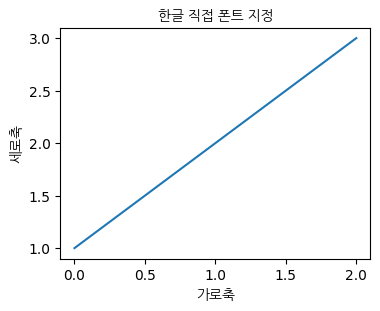

In [60]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(4,3))
plt.plot([1, 2, 3])
plt.title('한글 직접 폰트 지정', fontproperties=fontprop)
plt.xlabel('가로축', fontproperties=fontprop)
plt.ylabel('세로축', fontproperties=fontprop)
plt.show()

In [4]:
import pandas as pd

pd.set_option('display.max_rows', None)
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.tsv', sep="\t")
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
# 한글 컬럼명 변경
old_cols = train.columns
new_cols = ['거래ID','상품이름','상품상태','카테고리','브랜드','판매가격','배송주체','제품설명']

train = train.rename(columns=dict(zip(old_cols, new_cols)))
train.head()

,거래ID,상품이름,상품상태,카테고리,브랜드,판매가격,배송주체,제품설명
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [8]:
# 결측치 확인
train.isna().sum()

,0
거래ID,0
상품이름,0
상품상태,0
카테고리,6327
브랜드,632682
판매가격,0
배송주체,0
제품설명,6


In [6]:
# 카테고리 결측치 삭제
train = train[train['카테고리'].notna()].copy()
train.isna().sum()

,0
거래ID,0
상품이름,0
상품상태,0
카테고리,0
브랜드,629225
판매가격,0
배송주체,0
제품설명,6


In [7]:
# 상품 카테고리를 분리하여 상품군을 정리함
category = train['카테고리'].str.split('/', expand=True)
train['대분류']=category[0]
train['중분류']=category[1]
train['소분류']=category[2]
train.head()

,거래ID,상품이름,상품상태,카테고리,브랜드,판매가격,배송주체,제품설명,대분류,중분류,소분류
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [8]:
# 가격 왜곡 확인을 위한 그룹 평균 가격, 편차 가격 확인
group_cols = ['대분류','중분류','브랜드','상품상태','배송주체']
stats = train.groupby(group_cols)['판매가격'].agg(['mean','std','count']).reset_index()
stats = stats.rename(columns={'mean':'그룹평균', 'std':'그룹표준편차'})
stats.head()

,대분류,중분류,브랜드,상품상태,배송주체,그룹평균,그룹표준편차,count
0,Beauty,Bath & Body,% Pure,1,0,9.500000,0.707107,2
1,Beauty,Bath & Body,% Pure,1,1,5.500000,0.707107,2
2,Beauty,Bath & Body,AERIN,1,1,18.000000,NaN,1
3,Beauty,Bath & Body,Arbonne,1,0,24.333333,3.511885,3
4,Beauty,Bath & Body,Arbonne,1,1,10.500000,7.778175,2


In [9]:
train = train.merge(stats, on=group_cols, how='left')

def label_price(row):
    if row['판매가격'] < row['그룹평균'] - row['그룹표준편차']:
        return 0 # 저평가 가격
    elif row['판매가격'] > row['그룹평균'] + row['그룹표준편차']:
        return 2 # 초과 가격
    else:
        return 1 # 정상 가격

train['가격라벨'] = train.apply(label_price, axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['대분류','중분류','소분류','브랜드','상품상태','배송주체']
for col in cols_to_encode:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))

In [15]:
feature_cols = [
    '대분류','중분류','소분류',
    '브랜드','상품상태','배송주체',
    '그룹평균','그룹표준편차'
]

X = train[feature_cols]
y = train['가격라벨']

In [16]:
X.isna().sum()


,0
대분류,0
중분류,0
소분류,0
브랜드,0
상품상태,0
배송주체,0
그룹평균,629225
그룹표준편차,653195


In [17]:
# 그룹 평균과 표준 편차의 결측치를 0으로 설정
X = X.fillna(0)

중고 시장에서 같은 조건의 상품이어도 가격이 비정상적으로 높거나, 낮은 경우가 있는지 가격 왜곡을 찾아보고자 함

(구매자에게 너무 비싼 상품을 피하도록 도와줄 수 있고, 판매자에게는 너무 싸게 파는걸 막아줄 수 있음)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [20]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value=0)

X_train_imp = imp.fit_transform(X_train)
X_test_imp = imp.transform(X_test)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',  # 불균형 클래스 대응
    n_jobs=-1
)

model.fit(X_train_imp, y_train)
pred = model.predict(X_test_imp)


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

           0       0.10      0.67      0.17      9399
           1       0.96      0.66      0.78    267048
           2       0.11      0.29      0.16     18795

    accuracy                           0.63    295242
   macro avg       0.39      0.54      0.37    295242
weighted avg       0.88      0.63      0.72    295242

[[  6319   1824   1256]
 [ 50372 175205  41471]
 [  7957   5415   5423]]


**"정상(1)" 클래스만 잘 맞추고, 저평가(0)와 초과가격(2)은 거의 못맞추는 상황**

저평가의 precision은 0.1, recall은 0.67로 싸게 올라온 상품은 많이 잡았지만, 대부분 틀리는 상황

정상의 percision은 0.96, recall은 0.66으로 정상은 정확히 맞추지만 절반만 탐지하는 상황

초과가격의 percision은 0.11, recall은 0.29로 비싼 상품은 거의 못잡는 상황

단순한 조건(카테고리, 브랜드, 상품상태, 배송주체)만으로는 비정상 가격을 탐지하기 어렵기 때문에 텍스트 기반으로 한 피처를 추가해 저평가와 초과가격 탐지 성능을 개선해보고자 함

In [23]:
import re
import numpy as np
import pandas as pd

def make_name_features(df):
    s = df['상품이름'].astype(str)
    s_lower = s.str.lower()

    # 기본 길이/단어/숫자 관련
    df['이름_길이'] = s.str.len()
    df['이름_단어수'] = s.str.split().apply(len)

    df['이름_숫자포함'] = s.str.contains(r'\d', regex=True).astype(int)
    df['이름_숫자개수'] = s.str.count(r'\d')

    # 연속 숫자 최대 길이
    def max_digit_run(text):
        runs = re.findall(r'\d+', str(text))
        if not runs:
            return 0
        return max(len(r) for r in runs)
    df['이름_최대숫자길이'] = s.apply(max_digit_run)

    # 사이즈 표기 (대충 cm, mm, ml, size, サイズ 등)
    size_patterns = [
        r'\d+\s*(cm|mm|ml)',
        r'\b(xs|s|m|l|xl|xxl)\b',
        'サイズ', 'size'
    ]
    size_regex = '|'.join(size_patterns)
    df['이름_사이즈표기'] = s_lower.str.contains(size_regex, regex=True).astype(int)

    # 브랜드명이 이름에 포함되어 있나 (브랜드 결측은 'Unknown'으로 먼저 채우는 게 좋음)
    df['브랜드'] = df['브랜드'].fillna('Unknown')
    brand_lower = df['브랜드'].astype(str).str.lower()
    df['이름_브랜드포함'] = [
        int(str(b) in str(name).lower() and b != 'unknown')
        for b, name in zip(brand_lower, s)
    ]

    # 키워드 세트들 (일본어 + 영어 섞어서)
    keywords_new = ['新品', '未使用', '新品未使用', 'brand new', 'new, unopened', '未開封']
    keywords_good = ['美品', 'good condition', '美中古']
    keywords_bad = ['ジャンク', 'broken', 'damaged', '故障', '動作不良', '傷あり', 'scratched']
    keywords_box_yes = ['箱あり', 'box included', 'with box', '箱付き', '箱付']
    keywords_box_no = ['箱なし', '箱無し', 'no box', '箱無']
    keywords_set = ['セット', 'set', '一式', 'まとめ売り', 'full set', 'コンプリート']
    keywords_rare = ['限定', 'レア', 'rare', 'limited edition', '限定版']

    def contains_any(text, keywords):
        t = str(text).lower()
        return any(k.lower() in t for k in keywords)

    df['이름_신품키워드'] = s.apply(lambda x: int(contains_any(x, keywords_new)))
    df['이름_상태좋음키워드'] = s.apply(lambda x: int(contains_any(x, keywords_good)))
    df['이름_불량키워드'] = s.apply(lambda x: int(contains_any(x, keywords_bad)))
    df['이름_박스있음'] = s.apply(lambda x: int(contains_any(x, keywords_box_yes)))
    df['이름_박스없음'] = s.apply(lambda x: int(contains_any(x, keywords_box_no)))
    df['이름_세트표기'] = s.apply(lambda x: int(contains_any(x, keywords_set)))
    df['이름_레어표기'] = s.apply(lambda x: int(contains_any(x, keywords_rare)))

    # 영어 비율 (알파벳 / 전체 글자 수)
    def english_ratio(text):
        t = str(text)
        if len(t) == 0:
            return 0.0
        eng = len(re.findall(r'[A-Za-z]', t))
        return eng / len(t)
    df['이름_영문비율'] = s.apply(english_ratio)

    return df


In [25]:
train = make_name_features(train)


/tmp/ipython-input-61287170.py:31: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['이름_사이즈표기'] = s_lower.str.contains(size_regex, regex=True).astype(int)


In [26]:
cols_bool = [
    '이름_숫자포함','이름_사이즈표기','이름_브랜드포함',
    '이름_신품키워드','이름_상태좋음키워드','이름_불량키워드',
    '이름_박스있음','이름_박스없음','이름_세트표기','이름_레어표기'
]

price_stats = []

for col in cols_bool:
    g = train.groupby(col)['판매가격'].agg(['count','mean','median']).reset_index()
    g['피처명'] = col
    price_stats.append(g)

price_stats_df = pd.concat(price_stats, ignore_index=True)
price_stats_df


,이름_숫자포함,count,mean,median,피처명,이름_사이즈표기,이름_브랜드포함,이름_신품키워드,이름_상태좋음키워드,이름_불량키워드,이름_박스있음,이름_박스없음,이름_세트표기,이름_레어표기
0,0.0,1114006,25.474569,17.0,이름_숫자포함,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,362202,30.645355,17.0,이름_숫자포함,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1268199,26.873326,17.0,이름_사이즈표기,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,208009,25.950348,18.0,이름_사이즈표기,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1476178,26.743020,17.0,이름_브랜드포함,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,30,39.133333,22.0,이름_브랜드포함,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1463981,26.667723,17.0,이름_신품키워드,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,12227,35.788951,20.0,이름_신품키워드,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1476008,26.741840,17.0,이름_상태좋음키워드,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,NaN,200,37.310000,24.0,이름_상태좋음키워드,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [27]:
label_col = '가격라벨'

label_dist_list = []

for col in cols_bool:
    ct = pd.crosstab(train[col], train[label_col], normalize='index')
    ct['피처명'] = col
    label_dist_list.append(ct.reset_index())

label_dist_df = pd.concat(label_dist_list, ignore_index=True)
label_dist_df


가격라벨,이름_숫자포함,0,1,2,피처명,이름_사이즈표기,이름_브랜드포함,이름_신품키워드,이름_상태좋음키워드,이름_불량키워드,이름_박스있음,이름_박스없음,이름_세트표기,이름_레어표기
0,0.0,0.034526,0.904942,0.060532,이름_숫자포함,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.023636,0.903424,0.072940,이름_숫자포함,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.030256,0.907569,0.062176,이름_사이즈표기,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.041599,0.886284,0.072117,이름_사이즈표기,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.031854,0.904571,0.063575,이름_브랜드포함,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.033333,0.833333,0.133333,이름_브랜드포함,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.031852,0.904615,0.063534,이름_신품키워드,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.032142,0.899158,0.068700,이름_신품키워드,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.031853,0.904570,0.063577,이름_상태좋음키워드,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,NaN,0.040000,0.900000,0.060000,이름_상태좋음키워드,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [28]:
# 기존 숫자 피처
base_cols = [
    '대분류','중분류','소분류',
    '브랜드','상품상태','배송주체',
    '그룹평균','그룹표준편차'
]

name_feat_cols = [
    '이름_길이','이름_단어수','이름_숫자포함','이름_숫자개수','이름_최대숫자길이',
    '이름_사이즈표기','이름_브랜드포함','이름_신품키워드','이름_상태좋음키워드',
    '이름_불량키워드','이름_박스있음','이름_박스없음','이름_세트표기',
    '이름_레어표기','이름_영문비율'
]

feature_cols = base_cols + name_feat_cols


In [29]:
X = train[feature_cols].copy()
y = train['가격라벨'].copy()

X = X.fillna(0)

같은 조건 중 **상품이름**에 다양한 조건을 걸 수 있도록 피처를 생성하고 동일한 로지스틱 모델을 사용

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    n_jobs=-1
)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

           0       0.10      0.61      0.17      9399
           1       0.96      0.65      0.78    267048
           2       0.13      0.39      0.19     18795

    accuracy                           0.63    295242
   macro avg       0.40      0.55      0.38    295242
weighted avg       0.88      0.63      0.72    295242

[[  5758   1651   1990]
 [ 45494 173282  48272]
 [  6397   4991   7407]]


상품이름 기반 피처를 생성하고 **초과 가격 탐지 능력이 개선**됨

(이전 성능 vs 지금 성능)

저평가

    percision | 이전 : 0.10 / 지금 : 0.10 (거의 동일)
    recall | 이전 : 0.67 / 지금 : 0.61 (조금 하락)
    f1 | 이전 : 0.17 / 지금 : 0.17 (변화 없음)

정상

    percision | 이전 : 0.96 / 지금 : 0.96 (유지됨)
    recall | 이전 : 0.66 / 지금 : 0.65 (거의 동일)

초과가격

    percision | 이전 : 0.11 / 지금 : 0.13 (18% 상승)
    recall | 이전 : 0.29 / 지금 : 0.39 (34% 상승)
    f1 | 이전 : 0.16 / 지금 : 0.17 (변화 없음)

상품명 기반 피처로 과대 포지션을 잡는 데에는 도움을 줄 수 있었음

레어 상품, 한정판, 신품/미개봉 등의 요소들로 초과가격을 예측할 수 있었음

초과가격의 혼동행렬도 5,423에서 7407로 이전보다 증가함

---

이번에는 제품설명을 기반으로 추가적인 모델 성능을 개선하고자 함

In [32]:
import re
import numpy as np
import pandas as pd

def make_desc_features(df):
    s = df['제품설명'].astype(str)
    s_lower = s.str.lower()

    # 1) 길이, 단어 수, 숫자 관련
    df['설명_길이'] = s.str.len()
    df['설명_단어수'] = s.str.split().apply(len)
    df['설명_숫자포함'] = s.str.contains(r'\d', regex=True).astype(int)
    df['설명_숫자개수'] = s.str.count(r'\d')

    # 2) 사용 기간 언급 (년/개월/월 등)
    pattern_period = r'(年|年間|年ほど|年位|yrs|years?|ヶ月|か月|month|months?)'
    df['설명_사용기간표기'] = s.str.contains(pattern_period, regex=True).astype(int)

    # 3) 신품/미사용 키워드
    keywords_new = ['新品', '未使用', '新品未使用', 'brand new', 'unopened', '未開封']

    # 4) 사용감/보통 상태 키워드
    keywords_used = ['使用感', 'used', '多少の傷', '少し傷', '小傷']

    # 5) 불량/고장 키워드
    keywords_bad = ['ジャンク', 'broken', 'damaged', '故障', '動作不良', '電源入らない', 'ヒビ', 'crack']

    # 6) 구성품 있음 (충전기/케이블/박스/설명서 등)
    keywords_accessories_yes = [
        '付属品あり', '付属品揃って', 'ケーブル付', '充電器付', '箱あり', '箱付き', '箱付',
        '説明書あり', 'with charger', 'with cable', 'with box', 'complete'
    ]

    # 7) 구성품 없음
    keywords_accessories_no = [
        '付属品なし', '付属品無', 'ケーブルなし', '充電器なし', '箱なし', '箱無し',
        '説明書なし', 'no charger', 'no cable', 'no box'
    ]

    # 8) 환불/교환 불가
    keywords_noreturn = [
        '返品不可', 'ノークレームノーリターン', 'nc.nr', 'no return', 'no refund'
    ]

    # 9) 레어/한정/콜라보
    keywords_rare = ['限定', 'レア', 'rare', 'limited edition', 'コラボ']

    def contains_any(text, keywords):
        t = str(text).lower()
        return any(k.lower() in t for k in keywords)

    df['설명_신품키워드'] = s.apply(lambda x: int(contains_any(x, keywords_new)))
    df['설명_사용감키워드'] = s.apply(lambda x: int(contains_any(x, keywords_used)))
    df['설명_불량키워드'] = s.apply(lambda x: int(contains_any(x, keywords_bad)))
    df['설명_구성품있음'] = s.apply(lambda x: int(contains_any(x, keywords_accessories_yes)))
    df['설명_구성품없음'] = s.apply(lambda x: int(contains_any(x, keywords_accessories_no)))
    df['설명_환불불가'] = s.apply(lambda x: int(contains_any(x, keywords_noreturn)))
    df['설명_레어표기'] = s.apply(lambda x: int(contains_any(x, keywords_rare)))

    # 10) 영문 비율
    def english_ratio(text):
        t = str(text)
        if len(t) == 0:
            return 0.0
        eng = len(re.findall(r'[A-Za-z]', t))
        return eng / len(t)

    df['설명_영문비율'] = s.apply(english_ratio)

    return df


In [33]:
train = make_desc_features(train)


/tmp/ipython-input-2628283307.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['설명_사용기간표기'] = s.str.contains(pattern_period, regex=True).astype(int)


In [34]:
feature_cols = [
    '대분류','중분류','소분류','브랜드','상품상태','배송주체',
    '그룹평균','그룹표준편차',

    # 상품명 기반
    '이름_길이','이름_단어수','이름_숫자포함','이름_숫자개수','이름_최대숫자길이',
    '이름_신품키워드','이름_불량키워드','이름_박스있음','이름_박스없음','이름_레어표기',

    # 설명 기반
    '설명_길이','설명_단어수','설명_숫자포함','설명_숫자개수',
    '설명_사용기간표기','설명_신품키워드','설명_사용감키워드',
    '설명_불량키워드','설명_구성품있음','설명_구성품없음','설명_레어표기'
]


In [35]:
X = train[feature_cols].fillna(0)
y = train['가격라벨']


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    n_jobs=-1
)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

           0       0.10      0.64      0.17      9405
           1       0.96      0.65      0.77    267067
           2       0.14      0.40      0.21     18770

    accuracy                           0.63    295242
   macro avg       0.40      0.56      0.38    295242
weighted avg       0.88      0.63      0.72    295242

[[  6060   1628   1717]
 [ 49104 172958  45005]
 [  6326   4924   7520]]


제품설명 기반 피처를 생성하고 **초과 가격 탐지 능력이 더 개선**됨

(기본 조건 성능 vs 상품이름 성능 vs 제품설명 성능)

저평가

    percision | 기본 : 0.10 / 상품이름 : 0.10 / 제품설명 : 0.10 (변화 없음)
    recall | 기본 : 0.67 / 상품이름 : 0.61 / 제품설명 : 0.64 (다시 상승)
    f1 | 기본 : 0.17 / 상품이름 : 0.17 / 제품설명 : 0.17 (변화 없음)

정상

    percision | 기본 : 0.96 / 상품이름 : 0.96 / 제품설명 : 0.96 (유지됨)
    recall | 기본 : 0.66 / 상품이름 : 0.65 / 제품설명 : 0.65 (거의 동일)

초과가격

    percision | 기본 : 0.11 / 상품이름 : 0.13 / 제품설명 : 0.14 (소폭 상승)
    recall | 기본 : 0.29 / 상품이름 : 0.39  / 제품설명 : 0.40 (소폭 상승)
    f1 | 기본 : 0.16 / 상품이름 : 0.17  / 제품설명 : 0.21 (상승)

상품이름과 설명 기반 피처를 추가하면 초과가격 탐지 성능이 의미 있게 개선되는 것을 확인

피처로 설정한 신품, 구성품유무, 레어 등에 대한 요소들이 가격 왜곡 탐지에 도움을 주는 것으로 예상됨

---
상품이름과 제품설명에 다양한 정보가 있으면 더 높은 가격에 팔 수 있는지 가설을 입증하기 위해 여러가지 시각화를 준비

### **1. 텍스트 정보량이 많을수록 비싼가? (이름/설명 길이 -> 가격 경향선)**

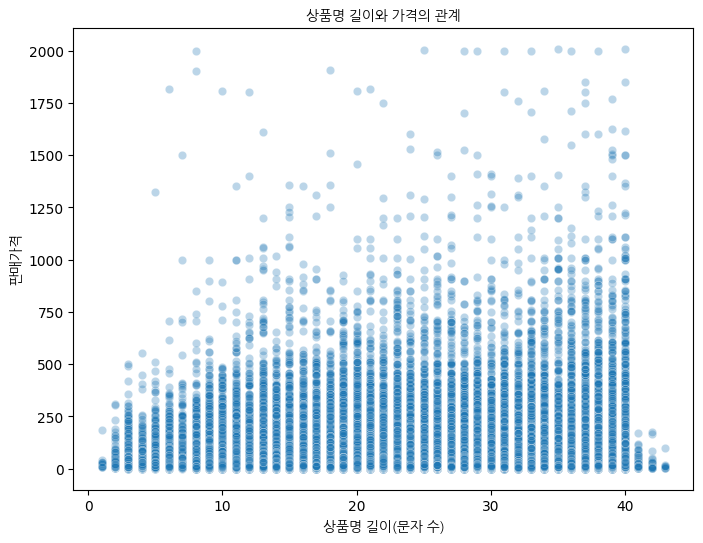

In [77]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=train['이름_길이'],
    y=train['판매가격'],
    alpha=0.3
)

plt.title('상품명 길이와 가격의 관계', fontproperties=fontprop)
plt.xlabel('상품명 길이(문자 수)', fontproperties=fontprop)
plt.ylabel('판매가격', fontproperties=fontprop)
plt.show()


결론 : 상품명 길이가 길수록 가격이 조금씩 증가하는 경향이 보임 (그러나 설명/단어 수에 비해서는 상관성이 아주 약하고 제한적)

1. 이름 길이가 늘어날수록, 고가 상품 점들이 더 자주 등장함
- 이름 길이가 5~10정도일 때는 1000이상 가격대가 적게 나타났지만,
- 20~40으로 갈수록 1000이상 고가 상품의 점들이 더 자주 등장함

      즉, 상품명이 더 길어질수록, 고가 상품이 포함될 확률이 증가하는 경향이 있다.
      앞으로 나올 설명 길이나 단어 수에선 이런 현상이 없었기 때문에 상품명 길이는 상대적으로 조금 더 의미 있는 변수일 수 있다고 판단

2. 하지만 전체적인 가격 분포는 여전히 낮은 가격대(0~300)에 밀집
- 이름 길이가 5일때도 40일때도 대부분 0~300

      즉, 대부분의 상품 가격은 이름 길이와 상관없이 낮음

가격이 0~300인 상품이 전체 데이터의 중심을 차지하고 있어서 상관관계가 강하게 나타나지는 않음

3. 산점도 전체 형태가 우상향 느낌을 아주 약하게 포함하고 있음
- 짧은 이름일수록 고가 가격이 적고 긴 이름일수록 고가 가격이 촘촘하고 다양함

      즉, 상품명이 길어질수록, 비싼 모델명/버전 정보/구성품 정보가 포함되는 경향이 있을 수 있음
      예) iPhone 12 Pro Max 256GB Box Included

다만 여전히 전체 상품은 낮은 가격대에 집중되어서 **상품명 길이 자체가 가격을 강력하게 설명하는 변수가 되긴 어려운 것으로 보임**

---
### **2. 상품명에 단어 수가 많을수록 비싼가? (단어 수 vs 가격)**

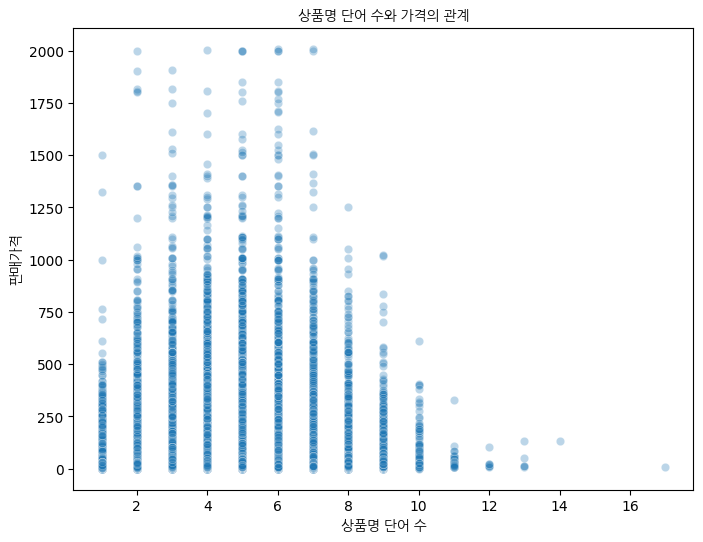

In [78]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=train['이름_단어수'],
    y=train['판매가격'],
    alpha=0.3
)

plt.title('상품명 단어 수와 가격의 관계', fontproperties=fontprop)
plt.xlabel('상품명 단어 수', fontproperties=fontprop)
plt.ylabel('판매가격', fontproperties=fontprop)
plt.show()


결론 : 상품명 단어 수는 가격과 거의 무관하고 단어 수가 많아질수록 가격은 오히려 낮아지는 경항을 보임

1. 단어 수가 많을수록 가격이 떨어짐
- 그래프가 오른쪽으로 갈수록 고가 상품도 없고 대부분 낮은 가격대에 몰려 있음

      즉, 단어 수가 많아도 고가가 되는 게 아니라, 오히려 설명 같은 제목을 쓰는 저가 상품이 많다는 것으로 보임

2. 고가 상품은 단어 수 3~6개 구간에 집중됨
- 단어가 적당히 짧고 핵심적인 제목들이 고가에 많은 것으로 보임
- 반대로 단어 수 10개 이상 상품 중 고가는 거의 없음

#### *그러면 어째서 상품명이 길면 고가 가격이 있는데 단어가 많으면 저가 가격만 많을까?*

고가 상품의 특징으론 모델명, 버전명, 구성품 정보 등이 있는데 이것들은 대부분 단어가 많진 않지만 단어가 길기 때문임

예) GeForce RTX 3060 Ti 8GB GDDR6, Air Jordan 1 Retro High OG Shadow, Alexander McQueen Oversized Sneaker

아마 저가 상품의 상품명이 긴 이유는 불필요한 말을 많이 했을 확률이 높은 것으로 보임

---

### **3. 상품이름에 숫자 포함 여부 vs 가격 (모델명/버전 여부)**

왼쪽 = 없음 , 오른쪽 = 있음

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


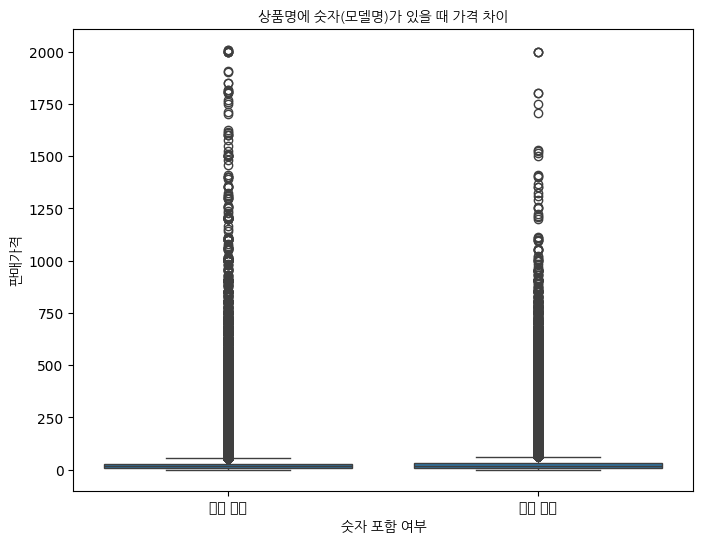

In [79]:
plt.figure(figsize=(8,6))

sns.boxplot(
    x=train['이름_숫자포함'],
    y=train['판매가격']
)

plt.xticks([0,1], ['숫자 없음', '숫자 있음'])

plt.title('상품명에 숫자(모델명)가 있을 때 가격 차이', fontproperties=fontprop)
plt.xlabel('숫자 포함 여부', fontproperties=fontprop)
plt.ylabel('판매가격', fontproperties=fontprop)
plt.show()

결론 : 상품명에 숫자가 포함되었는지 여부만으로는 가격 차이가 거의 없음

다만, 두 그룹 모두 고가 상품이 존재하므로 숫자 포함 여부는 가격의 직접적인 결정 요소는 아니었음

1. 두 그룹의 중앙값이 거의 동일
- 0과 1 모두 박스 위치가 거의 같아서 중앙값이 비슷하다고 보임

      즉, 숫자가 필요 없는 고가 카테고리(럭셔리 브랜드)와 숫자가 포함되는 고가 카테고리(전자제품) 둘 다 존재하기 때문에 숫자 포함 여부는 전체 가격과 거의 상관이 없게 되어버림

---
### 4. **“키워드가 있을 때 vs 없을 때 가격 차이” (상품명에 “신품 키워드” 있는 경우)**

왼쪽 : 없음 , 오른쪽 : 있음

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

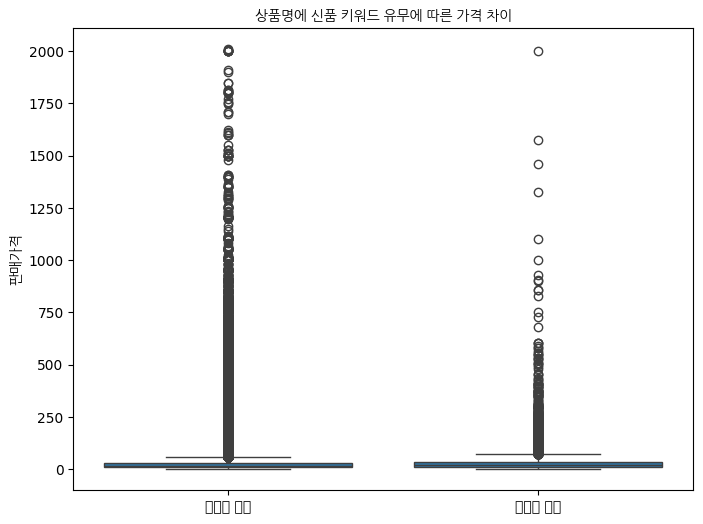

In [67]:
plt.figure(figsize=(8,6))

sns.boxplot(
    x=train['이름_신품키워드'],         # 0 = 없음, 1 = 있음
    y=train['판매가격']
)

plt.xticks([0,1], ['키워드 없음', '키워드 있음'])
plt.title('상품명에 신품 키워드 유무에 따른 가격 차이', fontproperties=fontprop)
plt.xlabel('')
plt.ylabel('판매가격', fontproperties=fontprop)
plt.show()

결론 : 키워드 유무가 가격에 큰 차이를 만들었다고 보기 어렵다.

1. 두 그룹의 중앙값이 거의 동일
- 키워드 없음과 있음 모두 박스 위치가 거의 같아서 중앙값이 비슷하다고 보임 (평균적인 상품 가격은 차이가 없다)

2. 그러나 극단적 고가 상품은 조금 차이가 있음
- 키워드 있음 그룹이 더 극단적으로 높은 가격을 가진 제품들을 포함하고 있어서 일부에선 키워드가 영향을 줄 가능성은 있지만 가격 형성에서는 영향이 없다고 판단됨

---

이제부터 제품설명의 그래프를 확인

### 1. **설명 길이가 길면 가격이 올라가나? (산점도 시각화)**

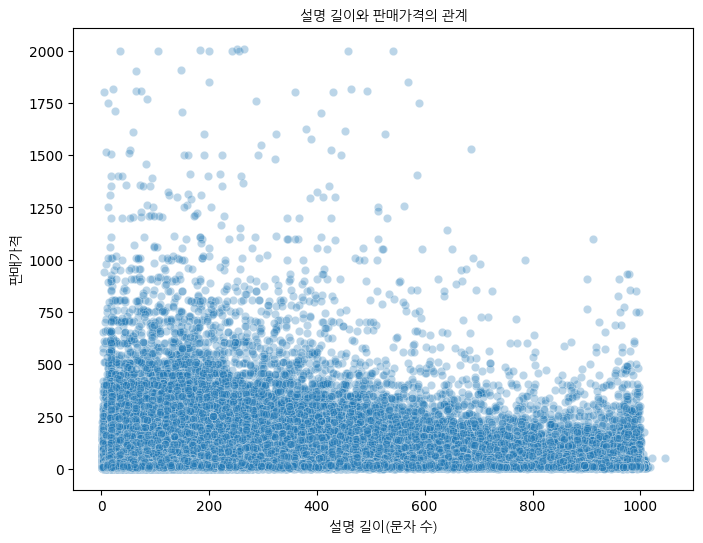

In [64]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=train['설명_길이'],
    y=train['판매가격'],
    alpha=0.3
)

plt.title('설명 길이와 판매가격의 관계', fontproperties=fontprop)
plt.xlabel('설명 길이(문자 수)', fontproperties=fontprop)
plt.ylabel('판매가격', fontproperties=fontprop)
plt.show()


결론 : 상품 설명 길이가 길다고 해서 가격이 올라가는 건 아니다.

1. 그래프의 점들이 전체적으로 가로로 퍼져 있음
- 설명 길이(가로축)가 50이든, 500이든, 1000이든 가격(세로축)과 거의 비슷한 범위에서 퍼져 있음

      즉, 설명이 길다고 해서 가격이 높아지는 비례는 아니었음

2. 설명 길이가 짧은 구간(0~100)에서도 이미 가격이 높은 상품들이 존재함
- 가격 1000-2000 같은 고가 상품들도 설명이 50-100글자 정도만 있어도 등장함

      즉, 고가 상품이 설명을 길게 쓴다는 증거가 없음

3. 산점도에 전체적으로 패턴이 없음
- 두 변수 간의 관계가 거의 없어 설명 길이는 가격을 예측하는 주요 요인이 아니라는 것을 확인
- 메루카리의 가격은 설명 길이보다 브랜드, 제품 상태, 구성품 유무, 모델명, 카테고리 같은 정보에 더 민감하다고 볼 수 있음

---

### **2. “설명 정보량이 많으면 가격이 올라가나?” (단어 수 기반)**

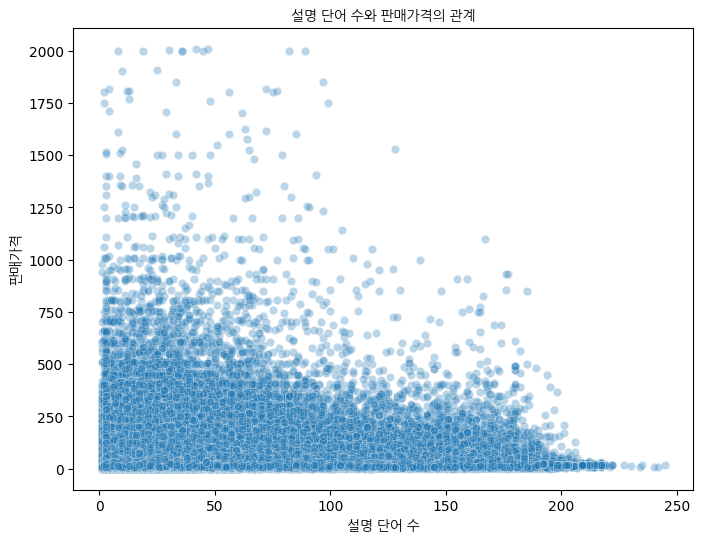

In [69]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=train['설명_단어수'],
    y=train['판매가격'],
    alpha=0.3
)

plt.title('설명 단어 수와 판매가격의 관계', fontproperties=fontprop)
plt.xlabel('설명 단어 수', fontproperties=fontprop)
plt.ylabel('판매가격', fontproperties=fontprop)
plt.show()


결론 : 설명 단어 수가 많아진다고 해서 가격이 올라가진 않음

1. 그래프 전체적으로 패턴이 없음
- 단어 수가 0~50이든 100이든 200이든 가격대는 크게 달라지지 않고 거의 같은 범위에 몰려 있음 (상관 관계가 매우 약함)

2. 낮은 가격대(0~300)의 상품은 어떤 상황에서도 많음
- 단어 수가 적어도 많아도 대부분의 상품 가격이 0~300에 모여 있어서 가격을 결정하는 요인이 텍스트 정보량은 아닌 것으로 보임

3. 오히려 단어 수가 많아질수록 저가 상품의 분포가 더 많아 보임
- 많은 설명을 길게 쓰는 건 고가 상품이라서가 아니라 오히려 저가 상품일 가능성이 있음

      즉, 설명과 정보량이 길어도 좋은 정보는 아니고 판매자의 개인 말투에 영향 받을 수 있어서 핵심 요인은 아니라고 봐야 될 것 같음

---

### **3. “설명에 신품/레어/박스 키워드가 있을 때 가격 차이” (설명에 '레어' 키워드)**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

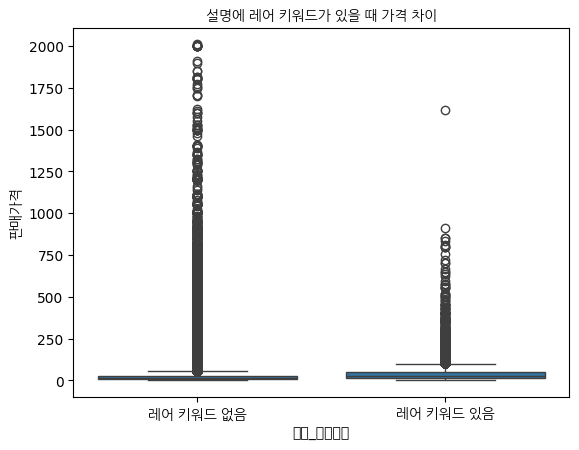

In [70]:
sns.boxplot(
    x=train['설명_레어표기'],
    y=train['판매가격']
)
plt.xticks([0,1], ['레어 키워드 없음', '레어 키워드 있음'], fontproperties=fontprop)
plt.title('설명에 레어 키워드가 있을 때 가격 차이', fontproperties=fontprop)
plt.ylabel('판매가격', fontproperties=fontprop)
plt.show()


결론 : 키워드가 있다고 해서 평균 가격이 눈에 띄게 올라가진 않음

1. 두 그룹의 중앙값이 거의 동일
- 키워드 없음과 있음 모두 박스 위치가 거의 같아서 중앙값이 비슷하다고 보임 (평균적인 상품 가격은 차이가 없다)

2. 일부 극단적 고가 상품의 개수는 차이가 있음
- 키워드 없음인 상품은 1500~2000 같은 고가 상품이 존재하고, 키워드 있음인 상품은 outlier 점들이 약간 더 많고 더 위까지 퍼져 있음

      즉, 전체 평균 가격은 동일하나, 일부 프리미엄 상품에서는 키워드가 가격을 올리는 요인으로 작용할 순 있을 것 같음
      (신품, 레어, 박스같은 핵심 키워드가 포함된 상품이 평균적으로 더 높은 가격을 받는 것은 아니었다.)

---
지금까지 가격의 절대값을 보고 분석을 했지만, 어떤 상품은 2만 달러가 정상이고, 어떤 상품은 5백 달러가 정상일 수 있듯 상품만을 보고 가격을 판단할 수는 없음

상품군별 평균 가격을 기준으로 삼아야만 비정상 가격을 판별하기 때문에 동일 조건 상품끼리 정상 가격을 정의하기 위해서 그룹 평균의 가격과 실제 판매 가격의 점수를 빼 **가격 왜곡 점수**를 알아보고자 함

- 음수 : 평소보다 싸게 팔림(저평가)
- 양수 : 평균보다 비싸게 팔림 (초과가격)

      즉, 상품이 정상가 대비 얼마나 비정상적으로 비싸거나 싼지를 수치화한 지표

텍스트 정보(상품명/설명)가 왜곡을 줄이거나 키우는지를 분석하기 위해 아래와 같이 설정을 함

In [85]:
# 정상 가격 그룹 기준
group_cols = ['대분류', '중분류', '소분류', '브랜드', '상품상태', '배송주체']

# 그룹 평균/중앙값 계산
group_stats = train.groupby(group_cols)['판매가격'].agg(['mean', 'median']).reset_index()

group_stats.columns = group_cols + ['그룹평균', '그룹중앙값']

# train에 merge
train2 = train.merge(group_stats, on=group_cols, how='left')


In [88]:
# 텍스트 품질 점수(TQ: Text Quality Score)
# 필요에 따라 가중치 변경 가능

train2['TQ_score'] = (
    train2['이름_길이'].apply(lambda x: 1 if x > 10 else 0) +
    train2['이름_단어수'].apply(lambda x: 1 if x < 10 else 0) +
    train2['이름_숫자포함'] * 1 +
    train2['이름_신품키워드'] * 1
)


In [93]:
train2['왜곡점수'] = train2['판매가격'] - train2['그룹평균_y']

In [95]:
def classify_distortion(row):
    base = row['그룹평균_y']
    price = row['판매가격']

    if price < base * 0.7:
        return 0  # 저평가
    elif price > base * 1.3:
        return 2  # 고평가
    else:
        return 1  # 정상가격

train2['왜곡라벨'] = train2.apply(classify_distortion, axis=1)


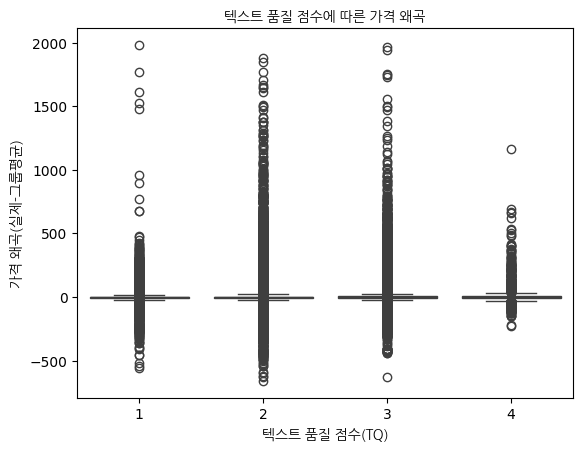

In [96]:
sns.boxplot(x=train2['TQ_score'], y=train2['왜곡점수'])
plt.title('텍스트 품질 점수에 따른 가격 왜곡', fontproperties=fontprop)
plt.xlabel('텍스트 품질 점수(TQ)', fontproperties=fontprop)
plt.ylabel('가격 왜곡(실제-그룹평균)', fontproperties=fontprop)
plt.show()


#### 지금 그래프가 보여주는 것

- x축: 텍스트 품질 점수(TQ) = 1, 2, 3, 4
- y축: 가격 왜곡 = 실제 가격 - 그룹평균

중앙값(가운데 가로선) 기준으로 보면 전부 위치가 비슷해보임

-> 텍스트 품질이 높다고 해서 평균적으로 더 싸게.비싸게 팔린다는 뚜렷한 차이는 없음

      즉, TQ가 높다고 해서 가격 왜곡이 줄거나 늘지는 않아보임

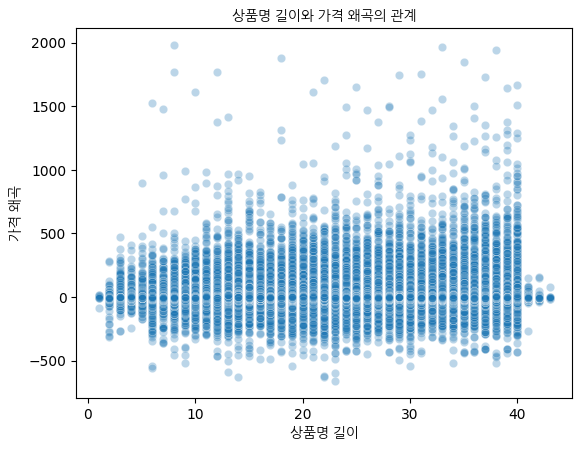

In [97]:
sns.scatterplot(x=train2['이름_길이'], y=train2['왜곡점수'], alpha=0.3)
plt.title('상품명 길이와 가격 왜곡의 관계', fontproperties=fontprop)
plt.xlabel('상품명 길이', fontproperties=fontprop)
plt.ylabel('가격 왜곡', fontproperties=fontprop)
plt.show()


결론 : 상품명 길이가 길어도 가격 왜곡(저평가/고평가)에 뚜렷한 변화는 없음

하지만 길이가 길어질수록 가격 분산이 더 커지고 과대/과소 가격이 함께 증가한 것으로 보임

1. 길이가 짧을 때 (0-10자)
- 점들이 대부분 -300 - +300 근처에 모여 있음
- 짧은 제목일수록 그럭저럭 정상 가격에 가까운 경향
- 짧은 상품명은 정보가 적어서 보통 단가가 낮고 낮은 단가는 왜곡이 크게 발생하지 않기도 함

2. 길이가 15-40자까지 증가
- 점들이 700-1500까지 초과가격 증가
- -500-800수준의 저평가도 증가
- 길이가 길어질수록 가격 왜곡 폭이 커짐
- 맨 처음 설명했듯 상품명이 길수록 고가 상품이 많았기 때문

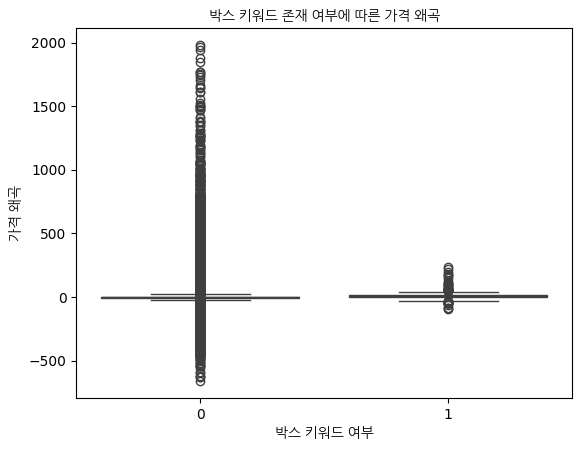

In [99]:
sns.boxplot(x=train2['이름_박스있음'], y=train2['왜곡점수'])
plt.title('박스 키워드 존재 여부에 따른 가격 왜곡', fontproperties=fontprop)
plt.xlabel('박스 키워드 여부', fontproperties=fontprop)
plt.ylabel('가격 왜곡', fontproperties=fontprop)
plt.show()


0 : 없음 , 1 : 있음

결론 : 박스 키워드가 포함된 상품은 가격 왜곡이 훨씬 제한적이고, 대부분 정상 가격에 가깝게 거래됨

반면 박스 키워드가 없는 상품은 가격 왜곡 폭이 크게 벌어짐

1. 박스 키워드가 없을 때 가격 왜곡 분산이 압도적으로 큼
- 600부터 +2000까지 엄청 넓게 퍼져 있음
- 위, 아래로 이상치들도 매우 많음

2. 박스 키워드가 있을 때 상품은 가격 왜곡이 거의 없음
- 거의 모두 -200+200 사이에 존재함

      즉, 박스 있음이라고 명확히 적어둔 상품은 정상가에 가까운 가격 형성 패턴이 확실하게 나타남

- 구성품이 명확하니 가격 예측이 쉽고, 구매자도 리스크가 줄어서 적정 가격에 거래되는 것으로 보임

- 판매자도 자신이 있어서 불필요하게 낮게 팔지 않음


-> 두 그룹의 분산 차이는 텍스트 정보의 중요성을 보여줌

박스가 있고, 박스 언급도 없는 차이가 가격 안정성, 왜곡, 시장 효율성에 영향을 주는 것으로 보임

In [90]:
train2.columns

Index(['거래ID', '상품이름', '상품상태', '카테고리', '브랜드', '판매가격', '배송주체', '제품설명', '대분류',
       '중분류', '소분류', '그룹평균_x', '그룹표준편차', 'count', '가격라벨', '텍스트', '이름_길이',
       '이름_단어수', '이름_숫자포함', '이름_숫자개수', '이름_최대숫자길이', '이름_사이즈표기', '이름_브랜드포함',
       '이름_신품키워드', '이름_상태좋음키워드', '이름_불량키워드', '이름_박스있음', '이름_박스없음', '이름_세트표기',
       '이름_레어표기', '이름_영문비율', '설명_길이', '설명_단어수', '설명_숫자포함', '설명_숫자개수',
       '설명_사용기간표기', '설명_신품키워드', '설명_사용감키워드', '설명_불량키워드', '설명_구성품있음',
       '설명_구성품없음', '설명_환불불가', '설명_레어표기', '설명_영문비율', '대분류텍스트', '브랜드텍스트',
       '이름_최대숫자', '이름_모델숫자', '그룹평균_y', '그룹중앙값', 'TQ_score'],
      dtype='object')